In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("Raw data/Trips_2019_Q1.csv")

In [3]:
df2020 = pd.read_csv('Raw data/Trips_2020_Q1.csv')

In [4]:
pd.set_option("display.max_columns", 15)


In [279]:
pd.set_option("display.max_rows", 100)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  int64  
 4   tripduration       365069 non-null  object 
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             345358 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 33.4+ MB


In [6]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             426887 non-null  object 
 1   rideable_type       426887 non-null  object 
 2   started_at          426887 non-null  object 
 3   ended_at            426887 non-null  object 
 4   start_station_name  426887 non-null  object 
 5   start_station_id    426887 non-null  int64  
 6   end_station_name    426886 non-null  object 
 7   end_station_id      426886 non-null  float64
 8   start_lat           426887 non-null  float64
 9   start_lng           426887 non-null  float64
 10  end_lat             426886 non-null  float64
 11  end_lng             426886 non-null  float64
 12  member_casual       426887 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 42.3+ MB


In [7]:
df.head(3)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0


In [8]:
df2020.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member


# Cleaning Data
Now we are going to clean all the required data. 


In this step I am going to convert all the time columns which are in string format(object) to date-time format.

In [9]:
df['start_time']

0         2019-01-01 00:04:37
1         2019-01-01 00:08:13
2         2019-01-01 00:13:23
3         2019-01-01 00:13:45
4         2019-01-01 00:14:52
                 ...         
365064    2019-03-31 23:51:32
365065    2019-03-31 23:52:37
365066    2019-03-31 23:52:38
365067    2019-03-31 23:53:08
365068    2019-03-31 23:53:48
Name: start_time, Length: 365069, dtype: object

In [10]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [11]:
df['start_time']

0        2019-01-01 00:04:37
1        2019-01-01 00:08:13
2        2019-01-01 00:13:23
3        2019-01-01 00:13:45
4        2019-01-01 00:14:52
                 ...        
365064   2019-03-31 23:51:32
365065   2019-03-31 23:52:37
365066   2019-03-31 23:52:38
365067   2019-03-31 23:53:08
365068   2019-03-31 23:53:48
Name: start_time, Length: 365069, dtype: datetime64[ns]

In [12]:
df['end_time'] = pd.to_datetime(df['end_time'])

In [13]:
df['end_time']

0        2019-01-01 00:11:07
1        2019-01-01 00:15:34
2        2019-01-01 00:27:12
3        2019-01-01 00:43:28
4        2019-01-01 00:20:56
                 ...        
365064   2019-04-01 00:04:09
365065   2019-03-31 23:58:09
365066   2019-04-01 00:06:44
365067   2019-03-31 23:56:06
365068   2019-04-01 00:01:16
Name: end_time, Length: 365069, dtype: datetime64[ns]

In [14]:
df["start_day_of_week"] = df['start_time'].dt.day_name()

In [15]:
df.head(3)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_day_of_week
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,Tuesday
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,Tuesday
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,Tuesday


In [16]:
df["end_day_of_week"] = df['end_time'].dt.day_name()

In [17]:
df['trip_duration'] = (df['end_time'] - df['start_time'])

In [18]:
df.head(3)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_day_of_week,end_day_of_week,trip_duration
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,Tuesday,Tuesday,0 days 00:06:30
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,Tuesday,Tuesday,0 days 00:07:21
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,Tuesday,Tuesday,0 days 00:13:49


In the next step I am going to remove the column named 'tripduration' as we have created a new column named 'trip_duration' in the right format that we need. 

In [19]:
df.drop(columns = 'tripduration', inplace = True)

In [20]:
df.head(3)

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_day_of_week,end_day_of_week,trip_duration
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,Tuesday,Tuesday,0 days 00:06:30
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,Tuesday,Tuesday,0 days 00:07:21
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,Tuesday,Tuesday,0 days 00:13:49


To have consistance in the column names I am going to change the cloumn name 'usertype' to 'user_type'

In [21]:
df.rename(columns = {'usertype': 'user_type'}, inplace = True)

Now I am going to check if there is any error in the 

In [22]:
df['user_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

Now I am going to check how many Subscriber and Customer are there in total.

In [23]:
df['user_type'].value_counts()

user_type
Subscriber    341906
Customer       23163
Name: count, dtype: int64

From the above data we can see that there are more Subscriber compared to Customer. 

Now I am going to check the data and see how it looks.

In [24]:
df.describe()

,trip_id,start_time,end_time,bikeid,from_station_id,to_station_id,birthyear,trip_duration
count,3.650690e+05,365069,365069,365069.000000,365069.000000,365069.000000,347046.000000,365069
mean,2.196087e+07,2019-02-19 21:43:15.415639296,2019-02-19 22:00:11.905631488,3429.484607,198.088816,198.581123,1981.674297,0 days 00:16:56.489992302
min,2.174244e+07,2019-01-01 00:04:37,2019-01-01 00:11:07,1.000000,2.000000,2.000000,1900.000000,0 days 00:01:01
25%,2.184876e+07,2019-01-23 05:26:54,2019-01-23 05:49:40,1777.000000,76.000000,76.000000,1975.000000,0 days 00:05:26
50%,2.196183e+07,2019-02-25 07:52:56,2019-02-25 08:03:50,3489.000000,170.000000,168.000000,1985.000000,0 days 00:08:44
75%,2.207182e+07,2019-03-17 16:52:47,2019-03-17 17:16:16,5157.000000,287.000000,287.000000,1990.000000,0 days 00:14:26
max,2.217853e+07,2019-03-31 23:53:48,2019-06-17 16:04:35,6471.000000,665.000000,665.000000,2003.000000,123 days 01:20:22
std,1.271750e+05,NaN,NaN,1923.321025,153.493553,154.468304,11.245683,0 days 07:45:23.856609849


In the above data we can see that there are some outliers in maximum trip duration. To understand better I am going to check what happened to that perticular data. 

In [25]:
filt = (df['trip_duration'] == '123 days 01:20:22')

In [26]:
df.loc[filt]

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birthyear,start_day_of_week,end_day_of_week,trip_duration
148897,21920842,2019-02-14 14:44:13,2019-06-17 16:04:35,3846,213,Leavitt St & North Ave,360,DIVVY Map Frame B/C Station,Customer,NaN,NaN,Thursday,Monday,123 days 01:20:22


As we can see for the trip_id '21920842' a customer had the bike with them for 123 days. 

Hence there is a huge difference in the mean and the median( which is indicated as 50%). 

# must create a scatter plot for better understanding of outliers that we found. 

In [27]:
df['trip_duration_in_days'] = df['trip_duration'].dt.days

In [28]:
df.head(4)

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birthyear,start_day_of_week,end_day_of_week,trip_duration,trip_duration_in_days
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,Tuesday,Tuesday,0 days 00:06:30,0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,Tuesday,Tuesday,0 days 00:07:21,0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,Tuesday,Tuesday,0 days 00:13:49,0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,Tuesday,Tuesday,0 days 00:29:43,0


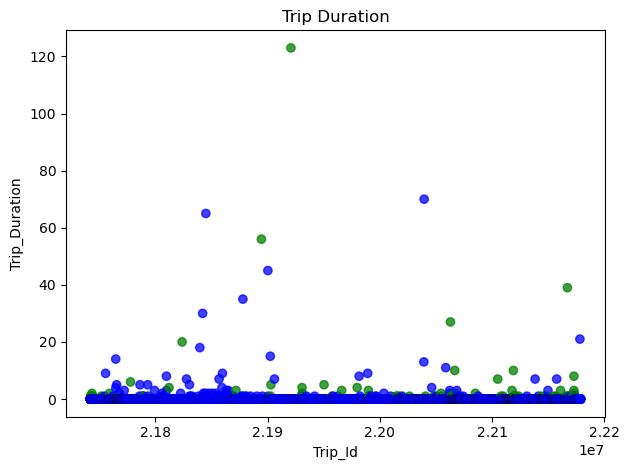

In [29]:
color_map = {'Subscriber':'blue', 'Customer': 'green'}
Trip_Duration = df['trip_duration_in_days']
Trip_Id = df['trip_id']
user_type = df['user_type'].map(color_map)
plt.scatter(Trip_Id,Trip_Duration, c=user_type,  
            linewidth = 1, alpha = 0.75)


plt.title('Trip Duration')
plt.xlabel('Trip_Id')
plt.ylabel('Trip_Duration')

plt.tight_layout()

In [30]:
filt = df['trip_duration_in_days'] > 1

In [31]:
df.loc[filt]['trip_duration_in_days'].count()

75

In total of 365,069 rides we can see that only 75 rides goes for more than 1 day and hence these 75 rides can be considered as an outliers if the organisation allows.  

In [32]:
# Convert the column to categorical data type with the correct order of days
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['start_day_of_week'] = pd.Categorical(df['start_day_of_week'], categories=weekdays_order, ordered=True)



In [33]:
grouped_df = df.groupby(by = ['start_day_of_week','user_type']).agg({'trip_id': 'count',
                                         'trip_duration':'median'})

In [34]:
grouped_df

trip_id          trip_duration
start_day_of_week user_type                                 
Monday            Customer       1892        0 days 00:21:10
                  Subscriber    48507        0 days 00:08:18
Tuesday           Customer       2728 0 days 00:22:38.500000
                  Subscriber    58277        0 days 00:08:23
Wednesday         Customer       2489        0 days 00:23:04
                  Subscriber    57925        0 days 00:08:22
Thursday          Customer       2920 0 days 00:22:26.500000
                  Subscriber    63983        0 days 00:08:19
Friday            Customer       3375        0 days 00:22:03
                  Subscriber    59672        0 days 00:08:12
Saturday          Customer       5993        0 days 00:25:24
                  Subscriber    29309        0 days 00:08:46
Sunday            Customer       3766 0 days 00:23:47.500000
                  Subscriber    24233        0 days 00:08:18

In [35]:
filt = df['user_type'] == 'Customer'
cust_df = df.loc[filt].groupby(by = 'start_day_of_week').agg({'trip_id': 'count',
                                         'trip_duration':'median'})

# cust_df = customer Data Frame

In [36]:
cust_df = cust_df.rename(columns= {'trip_id':'customer_trip_count',
                                'trip_duration':'customer_trip_duration'})

In [37]:
cust_df

,customer_trip_count,customer_trip_duration
start_day_of_week,,
Monday,1892,0 days 00:21:10
Tuesday,2728,0 days 00:22:38.500000
Wednesday,2489,0 days 00:23:04
Thursday,2920,0 days 00:22:26.500000
Friday,3375,0 days 00:22:03
Saturday,5993,0 days 00:25:24
Sunday,3766,0 days 00:23:47.500000


In [38]:
filt = df['user_type'] == 'Subscriber'
sub_df = df.loc[filt].groupby(by = 'start_day_of_week').agg({'trip_id': 'count',
                                         'trip_duration':'median'})
# sub_df = Subscriber Data Frame

In [39]:
sub_df = sub_df.rename(columns= {'trip_id':'subcriber_trip_count',
                                'trip_duration':'subcriber_trip_duration'})

In [40]:
sub_df

,subcriber_trip_count,subcriber_trip_duration
start_day_of_week,,
Monday,48507,0 days 00:08:18
Tuesday,58277,0 days 00:08:23
Wednesday,57925,0 days 00:08:22
Thursday,63983,0 days 00:08:19
Friday,59672,0 days 00:08:12
Saturday,29309,0 days 00:08:46
Sunday,24233,0 days 00:08:18


In [54]:
Combined_df = pd.concat([sub_df, cust_df], axis=1)


In [55]:
Combined_df

,subcriber_trip_count,subcriber_trip_duration,customer_trip_count,customer_trip_duration
start_day_of_week,,,,
Monday,48507,0 days 00:08:18,1892,0 days 00:21:10
Tuesday,58277,0 days 00:08:23,2728,0 days 00:22:38.500000
Wednesday,57925,0 days 00:08:22,2489,0 days 00:23:04
Thursday,63983,0 days 00:08:19,2920,0 days 00:22:26.500000
Friday,59672,0 days 00:08:12,3375,0 days 00:22:03
Saturday,29309,0 days 00:08:46,5993,0 days 00:25:24
Sunday,24233,0 days 00:08:18,3766,0 days 00:23:47.500000


In [61]:
Combined_df.reset_index(inplace = True)

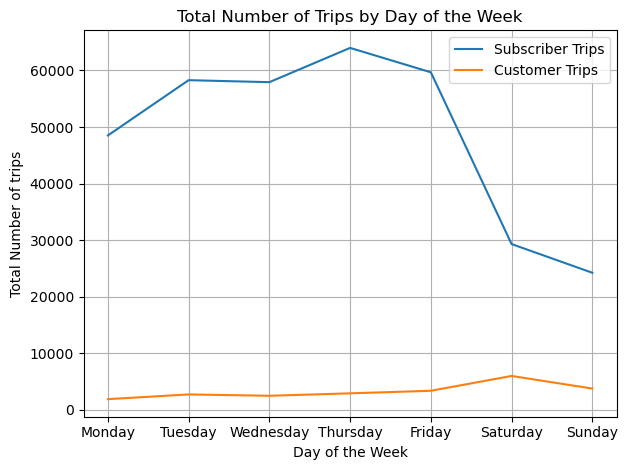

In [79]:
days = Combined_df['start_day_of_week']
sub_trips = Combined_df['subcriber_trip_count']
cust_trips = Combined_df['customer_trip_count']

# Plot subscriber trips
plt.plot(days,sub_trips, label='Subscriber Trips')

# Plot customer trips
plt.plot(days,cust_trips, label='Customer Trips')


# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of trips')
plt.title('Total Number of Trips by Day of the Week')

# Customize x-axis tick labels to display days of the week
plt.xticks(range(len(days)), days)

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()

### In the above chart, since the Subscriber trips are dominated in total number of trips we can see that  the graph of Customer trip does not show much change along the week. 
### But now lets isolate the graphs to visually see the actual impact of Customer Trips. 

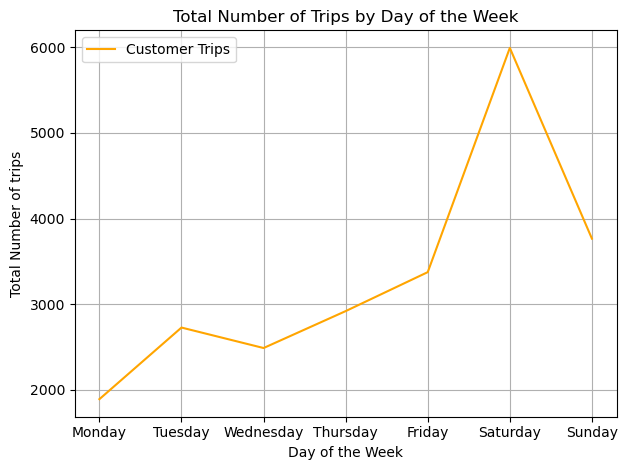

In [85]:
days = Combined_df['start_day_of_week']
cust_trips = Combined_df['customer_trip_count']


# Plot customer trips
plt.plot(days,cust_trips, label='Customer Trips', color = 'orange')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of trips')
plt.title('Total Number of Trips by Day of the Week')

# Customize x-axis tick labels to display days of the week
plt.xticks(range(len(days)), days)

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()


It is evident that there is a drastic change in the behaviour of the customer trips along the week.

### We can still compare the charts together by reducing the visual dominance by introducing log along the Y axis

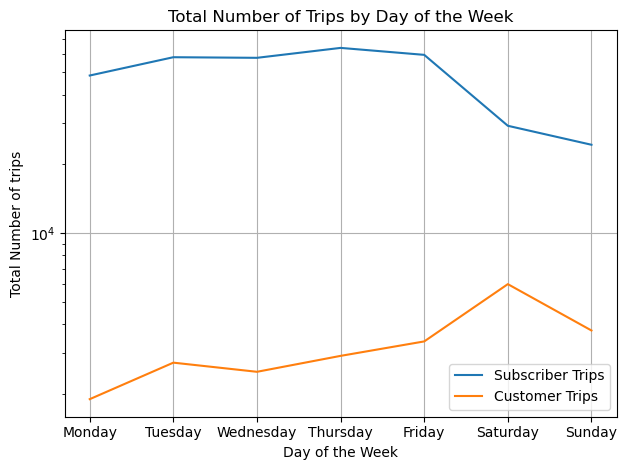

In [78]:
days = Combined_df['start_day_of_week']
sub_trips = Combined_df['subcriber_trip_count']
cust_trips = Combined_df['customer_trip_count']

# Plot subscriber trips
plt.plot(days,sub_trips, label='Subscriber Trips')

# Plot customer trips
plt.plot(days,cust_trips, label='Customer Trips')

# To reduce the visual dominace of the Subscriber trips we can use log along the Y axis 
plt.yscale('log')


# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of trips')
plt.title('Total Number of Trips by Day of the Week')

# Customize x-axis tick labels to display days of the week
plt.xticks(range(len(days)), days)

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()

### Now let's look into how these two trips relates when it comes to the length of the trips. 

In [87]:
Combined_df

,start_day_of_week,subcriber_trip_count,subcriber_trip_duration,customer_trip_count,customer_trip_duration
0,Monday,48507,0 days 00:08:18,1892,0 days 00:21:10
1,Tuesday,58277,0 days 00:08:23,2728,0 days 00:22:38.500000
2,Wednesday,57925,0 days 00:08:22,2489,0 days 00:23:04
3,Thursday,63983,0 days 00:08:19,2920,0 days 00:22:26.500000
4,Friday,59672,0 days 00:08:12,3375,0 days 00:22:03
5,Saturday,29309,0 days 00:08:46,5993,0 days 00:25:24
6,Sunday,24233,0 days 00:08:18,3766,0 days 00:23:47.500000


### Since the durations are in days- hour format we can convert them to minutes so that it will be easier to read the graph. 

In [90]:
Combined_df['subcriber_trip_duration(mins)'] = Combined_df['subcriber_trip_duration'].dt.total_seconds() / 60
Combined_df['customer_trip_duration(mins)'] = Combined_df['customer_trip_duration'].dt.total_seconds() / 60


In [91]:
Combined_df

,start_day_of_week,subcriber_trip_count,subcriber_trip_duration,customer_trip_count,customer_trip_duration,subcriber_trip_duration(mins),customer_trip_duration(mins)
0,Monday,48507,0 days 00:08:18,1892,0 days 00:21:10,8.300000,21.166667
1,Tuesday,58277,0 days 00:08:23,2728,0 days 00:22:38.500000,8.383333,22.641667
2,Wednesday,57925,0 days 00:08:22,2489,0 days 00:23:04,8.366667,23.066667
3,Thursday,63983,0 days 00:08:19,2920,0 days 00:22:26.500000,8.316667,22.441667
4,Friday,59672,0 days 00:08:12,3375,0 days 00:22:03,8.200000,22.050000
5,Saturday,29309,0 days 00:08:46,5993,0 days 00:25:24,8.766667,25.400000
6,Sunday,24233,0 days 00:08:18,3766,0 days 00:23:47.500000,8.300000,23.791667


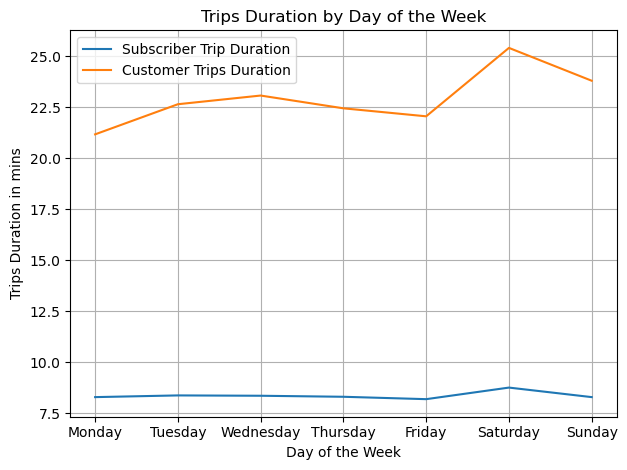

In [97]:
days = Combined_df['start_day_of_week']
sub_trips_len = Combined_df['subcriber_trip_duration(mins)']
cust_trips_len = Combined_df['customer_trip_duration(mins)']

# Plot subscriber trips
plt.plot(days,sub_trips_len, label='Subscriber Trip Duration')

# Plot customer trips
plt.plot(days,cust_trips_len, label='Customer Trips Duration')



# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Trips Duration in mins')
plt.title('Trips Duration by Day of the Week')

# Customize x-axis tick labels to display days of the week
plt.xticks(range(len(days)), days)

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()

## From the above charts we can see that the number of 'trips by subscriber' is high during the weekdays and then drops during the weekend. But when it comes to the 'trips by the customer' we can see that there is a sudden rise during the weekends. 

## Also, it is important to note that the 'average length' of the trips taken by the customer is 3 times more than the trips taken by the subscriber. 

### Now lets go deeper to find out why there exsists such a difference.

#### For that I am going to divide each day into '6 segments' to see the usage during early morning, morning, noon, afternoon, evening and latenight.  

In [303]:
df.head(3)

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birthyear,start_day_of_week,end_day_of_week,trip_duration,trip_duration_in_days
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,Tuesday,Tuesday,0 days 00:06:30,0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,Tuesday,Tuesday,0 days 00:07:21,0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,Tuesday,Tuesday,0 days 00:13:49,0


In [107]:
df_resampled = df.set_index('start_time')

In [111]:
df_resampled = df_resampled.resample('4H')


In [309]:
df['start_time'].dtype

dtype('<M8[ns]')

In [133]:
df['start_time'].dt.floor('4H')

0        2019-01-01 00:00:00
1        2019-01-01 00:00:00
2        2019-01-01 00:00:00
3        2019-01-01 00:00:00
4        2019-01-01 00:00:00
                 ...        
365064   2019-03-31 20:00:00
365065   2019-03-31 20:00:00
365066   2019-03-31 20:00:00
365067   2019-03-31 20:00:00
365068   2019-03-31 20:00:00
Name: start_time, Length: 365069, dtype: datetime64[ns]

In [304]:
df.head(4)

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birthyear,start_day_of_week,end_day_of_week,trip_duration,trip_duration_in_days
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,Tuesday,Tuesday,0 days 00:06:30,0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,Tuesday,Tuesday,0 days 00:07:21,0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,Tuesday,Tuesday,0 days 00:13:49,0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,Tuesday,Tuesday,0 days 00:29:43,0


In [398]:
df['start_time'] = pd.to_datetime(df['start_time'], format = '%Y-%m-%d %H:%M:%S')

In [399]:
df['start_time']

0        2019-01-01 00:04:37
1        2019-01-01 00:08:13
2        2019-01-01 00:13:23
3        2019-01-01 00:13:45
4        2019-01-01 00:14:52
                 ...        
365064   2019-03-31 23:51:32
365065   2019-03-31 23:52:37
365066   2019-03-31 23:52:38
365067   2019-03-31 23:53:08
365068   2019-03-31 23:53:48
Name: start_time, Length: 365069, dtype: datetime64[ns]

In [400]:
seg_df = df[['start_time','trip_id','user_type']]

In [401]:
seg_df

,start_time,trip_id,user_type
0,2019-01-01 00:04:37,21742443,Subscriber
1,2019-01-01 00:08:13,21742444,Subscriber
2,2019-01-01 00:13:23,21742445,Subscriber
3,2019-01-01 00:13:45,21742446,Subscriber
4,2019-01-01 00:14:52,21742447,Subscriber
...,...,...,...
365064,2019-03-31 23:51:32,22178524,Subscriber
365065,2019-03-31 23:52:37,22178525,Subscriber
365066,2019-03-31 23:52:38,22178526,Subscriber
365067,2019-03-31 23:53:08,22178527,Subscriber


In [302]:
seg_df['hour'] = seg_df['start_time'].dt.hour

/var/folders/jg/smy7jn_j1pg2mv78417g_0qc0000gn/T/ipykernel_1026/1772122303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_df['hour'] = seg_df['start_time'].dt.hour


In [402]:
seg_df.loc[:, 'hour'] = seg_df['start_time'].dt.hour

/var/folders/jg/smy7jn_j1pg2mv78417g_0qc0000gn/T/ipykernel_1026/1651153028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_df.loc[:, 'hour'] = seg_df['start_time'].dt.hour


In [403]:
seg_df['hour']

0          0
1          0
2          0
3          0
4          0
          ..
365064    23
365065    23
365066    23
365067    23
365068    23
Name: hour, Length: 365069, dtype: int32

In [404]:
seg_df.head(3)

,start_time,trip_id,user_type,hour
0,2019-01-01 00:04:37,21742443,Subscriber,0
1,2019-01-01 00:08:13,21742444,Subscriber,0
2,2019-01-01 00:13:23,21742445,Subscriber,0


In [595]:
filt = (seg_df['user_type'] == 'Subscriber')

In [596]:
sub_seg_df = seg_df.loc[filt]

In [566]:
filt = (seg_df['user_type'] == 'Customer')

In [567]:
cus_seg_df = seg_df.loc[filt]

In [568]:
cus_seg_df

,start_time,trip_id,user_type,hour
13,2019-01-01 00:23:43,21742456,Customer,0
17,2019-01-01 00:24:27,21742460,Customer,0
19,2019-01-01 00:29:19,21742463,Customer,0
21,2019-01-01 00:29:28,21742465,Customer,0
41,2019-01-01 01:02:54,21742487,Customer,1
...,...,...,...,...
365028,2019-03-31 22:33:52,22178472,Customer,22
365036,2019-03-31 22:44:49,22178482,Customer,22
365045,2019-03-31 23:00:28,22178494,Customer,23
365058,2019-03-31 23:32:54,22178517,Customer,23


In [597]:
sub_seg_df.set_index('start_time', inplace = True)

In [598]:
sub_seg_df

,trip_id,user_type,hour
start_time,,,
2019-01-01 00:04:37,21742443,Subscriber,0
2019-01-01 00:08:13,21742444,Subscriber,0
2019-01-01 00:13:23,21742445,Subscriber,0
2019-01-01 00:13:45,21742446,Subscriber,0
2019-01-01 00:14:52,21742447,Subscriber,0
...,...,...,...
2019-03-31 23:51:32,22178524,Subscriber,23
2019-03-31 23:52:37,22178525,Subscriber,23
2019-03-31 23:52:38,22178526,Subscriber,23


In [599]:
sub_seg_df = sub_seg_df.resample('4H').agg({'trip_id':'count','hour':'min'})

In [600]:
sub_seg_df

,trip_id,hour
start_time,,
2019-01-01 00:00:00,120,0
2019-01-01 04:00:00,47,4
2019-01-01 08:00:00,238,8
2019-01-01 12:00:00,347,12
2019-01-01 16:00:00,326,16
...,...,...
2019-03-31 04:00:00,71,4
2019-03-31 08:00:00,578,8
2019-03-31 12:00:00,927,12


In [601]:
sub_seg_df.rename(columns = {'trip_id': 'trip_count'}, inplace = True)

In [602]:
sub_seg_df

,trip_count,hour
start_time,,
2019-01-01 00:00:00,120,0
2019-01-01 04:00:00,47,4
2019-01-01 08:00:00,238,8
2019-01-01 12:00:00,347,12
2019-01-01 16:00:00,326,16
...,...,...
2019-03-31 04:00:00,71,4
2019-03-31 08:00:00,578,8
2019-03-31 12:00:00,927,12


In [603]:
sub_seg_df.groupby(['hour']).count() # The data is for 90 days

,trip_count
hour,
0,89
2,1
4,89
5,1
8,90
12,90
16,90
20,90


In [604]:
filt = sub_seg_df['hour'] == 2
sub_seg_df.loc[filt]

,trip_count,hour
start_time,,
2019-01-31,1,2


In [605]:
sub_seg_df = sub_seg_df.drop('2019-01-31')

In [606]:
filt = sub_seg_df['hour'] == 5
sub_seg_df.loc[filt]

,trip_count,hour
start_time,,
2019-01-30 04:00:00,16,5


In [607]:
sub_seg_df = sub_seg_df.drop('2019-01-30 04:00:00')

In [608]:
grouped_sub_seg_df = sub_seg_df.groupby(['hour']).median()

In [609]:
grouped_sub_seg_df

,trip_count
hour,
0,35.0
4,544.0
8,902.5
12,696.5
16,1503.0
20,241.0


In [610]:
grouped_sub_seg_df.reset_index(inplace = True)

In [611]:
grouped_sub_seg_df

,hour,trip_count
0,0,35.0
1,4,544.0
2,8,902.5
3,12,696.5
4,16,1503.0
5,20,241.0


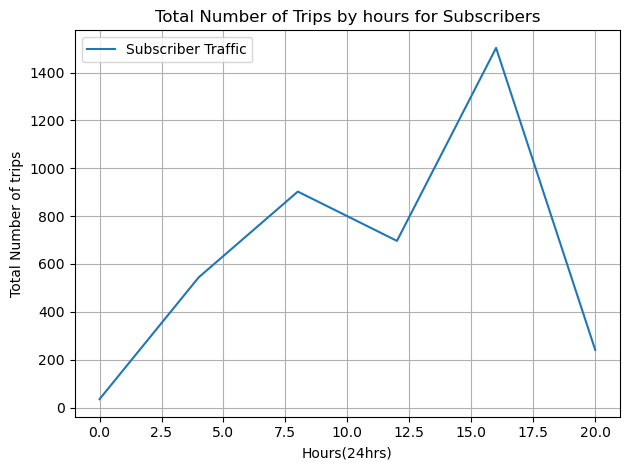

In [613]:
trip_counts = grouped_sub_seg_df['trip_count']
hours = grouped_sub_seg_df['hour']


# Plot customer trips
plt.plot(hours,trip_counts, label='Subscriber Traffic')

# Add labels and title
plt.xlabel('Hours(24hrs)')
plt.ylabel('Total Number of trips')
plt.title('Total Number of Trips by hours for Subscribers')



# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()

### Now we have to follow the same steps for creating customer segment

In [569]:
cus_seg_df

,start_time,trip_id,user_type,hour
13,2019-01-01 00:23:43,21742456,Customer,0
17,2019-01-01 00:24:27,21742460,Customer,0
19,2019-01-01 00:29:19,21742463,Customer,0
21,2019-01-01 00:29:28,21742465,Customer,0
41,2019-01-01 01:02:54,21742487,Customer,1
...,...,...,...,...
365028,2019-03-31 22:33:52,22178472,Customer,22
365036,2019-03-31 22:44:49,22178482,Customer,22
365045,2019-03-31 23:00:28,22178494,Customer,23
365058,2019-03-31 23:32:54,22178517,Customer,23


In [570]:
cus_seg_df['hour']

13         0
17         0
19         0
21         0
41         1
          ..
365028    22
365036    22
365045    23
365058    23
365060    23
Name: hour, Length: 23163, dtype: int32

In [571]:
cus_seg_df['hours'] = cus_seg_df['hour']

/var/folders/jg/smy7jn_j1pg2mv78417g_0qc0000gn/T/ipykernel_1026/4244423040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_seg_df['hours'] = cus_seg_df['hour']


In [572]:
cus_seg_df

,start_time,trip_id,user_type,hour,hours
13,2019-01-01 00:23:43,21742456,Customer,0,0
17,2019-01-01 00:24:27,21742460,Customer,0,0
19,2019-01-01 00:29:19,21742463,Customer,0,0
21,2019-01-01 00:29:28,21742465,Customer,0,0
41,2019-01-01 01:02:54,21742487,Customer,1,1
...,...,...,...,...,...
365028,2019-03-31 22:33:52,22178472,Customer,22,22
365036,2019-03-31 22:44:49,22178482,Customer,22,22
365045,2019-03-31 23:00:28,22178494,Customer,23,23
365058,2019-03-31 23:32:54,22178517,Customer,23,23


In [573]:
cus_seg_df.loc[:,'hour'] = pd.to_timedelta(cus_seg_df['hour'], unit='h')

In [546]:
cus_seg_df['hour'].dtype

dtype('<m8[ns]')

In [574]:
cus_seg_df

,start_time,trip_id,user_type,hour,hours
13,2019-01-01 00:23:43,21742456,Customer,0 days 00:00:00,0
17,2019-01-01 00:24:27,21742460,Customer,0 days 00:00:00,0
19,2019-01-01 00:29:19,21742463,Customer,0 days 00:00:00,0
21,2019-01-01 00:29:28,21742465,Customer,0 days 00:00:00,0
41,2019-01-01 01:02:54,21742487,Customer,0 days 01:00:00,1
...,...,...,...,...,...
365028,2019-03-31 22:33:52,22178472,Customer,0 days 22:00:00,22
365036,2019-03-31 22:44:49,22178482,Customer,0 days 22:00:00,22
365045,2019-03-31 23:00:28,22178494,Customer,0 days 23:00:00,23
365058,2019-03-31 23:32:54,22178517,Customer,0 days 23:00:00,23


In [388]:
#cus_seg_df['counter'] =  cus_seg_df.index

/var/folders/jg/smy7jn_j1pg2mv78417g_0qc0000gn/T/ipykernel_1026/942157629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_seg_df['counter'] =  cus_seg_df.index


In [548]:
cus_seg_df

,start_time,trip_id,user_type,hour,hours
13,2019-01-01 00:23:43,21742456,Customer,0 days 00:00:00,0
17,2019-01-01 00:24:27,21742460,Customer,0 days 00:00:00,0
19,2019-01-01 00:29:19,21742463,Customer,0 days 00:00:00,0
21,2019-01-01 00:29:28,21742465,Customer,0 days 00:00:00,0
41,2019-01-01 01:02:54,21742487,Customer,0 days 01:00:00,1
...,...,...,...,...,...
365028,2019-03-31 22:33:52,22178472,Customer,0 days 22:00:00,22
365036,2019-03-31 22:44:49,22178482,Customer,0 days 22:00:00,22
365045,2019-03-31 23:00:28,22178494,Customer,0 days 23:00:00,23
365058,2019-03-31 23:32:54,22178517,Customer,0 days 23:00:00,23


In [549]:
cus_seg_df['start_time'].max() - cus_seg_df['start_time'].min()

Timedelta('89 days 23:09:31')

In [575]:
cus_seg_df.set_index('hour', inplace = True)

In [576]:
cus_seg_df

,start_time,trip_id,user_type,hours
hour,,,,
0 days 00:00:00,2019-01-01 00:23:43,21742456,Customer,0
0 days 00:00:00,2019-01-01 00:24:27,21742460,Customer,0
0 days 00:00:00,2019-01-01 00:29:19,21742463,Customer,0
0 days 00:00:00,2019-01-01 00:29:28,21742465,Customer,0
0 days 01:00:00,2019-01-01 01:02:54,21742487,Customer,1
...,...,...,...,...
0 days 22:00:00,2019-03-31 22:33:52,22178472,Customer,22
0 days 22:00:00,2019-03-31 22:44:49,22178482,Customer,22
0 days 23:00:00,2019-03-31 23:00:28,22178494,Customer,23


In [552]:
cus_seg_df['hours'].dtype

dtype('int32')

In [577]:
cus_seg_df = cus_seg_df.resample('4H').agg({'trip_id':'count','hours':'min'})

In [578]:
cus_seg_df

,trip_id,hours
hour,,
0 days 00:00:00,415,0
0 days 04:00:00,526,4
0 days 08:00:00,3997,8
0 days 12:00:00,9528,12
0 days 16:00:00,7225,16
0 days 20:00:00,1472,20


In [579]:
cus_seg_df.rename(columns = {'trip_id': 'trip_count'}, inplace = True)

In [580]:
cus_seg_df

,trip_count,hours
hour,,
0 days 00:00:00,415,0
0 days 04:00:00,526,4
0 days 08:00:00,3997,8
0 days 12:00:00,9528,12
0 days 16:00:00,7225,16
0 days 20:00:00,1472,20


In [581]:
cus_seg_df[['hours','trip_count']]

In [584]:
cus_seg_df.set_index('hours', inplace = True)

In [586]:
cus_seg_df['trip_counts'] = cus_seg_df['trip_count']/90

In [587]:
cus_seg_df

,trip_count,trip_counts
hours,,
0,415,4.611111
4,526,5.844444
8,3997,44.411111
12,9528,105.866667
16,7225,80.277778
20,1472,16.355556


In [589]:
cus_seg_df.drop(columns = 'trip_count', inplace = True)

In [590]:
cus_seg_df

,trip_counts
hours,
0,4.611111
4,5.844444
8,44.411111
12,105.866667
16,80.277778
20,16.355556


In [592]:
cus_seg_df.reset_index(inplace = True)

In [593]:
cus_seg_df

,hours,trip_counts
0,0,4.611111
1,4,5.844444
2,8,44.411111
3,12,105.866667
4,16,80.277778
5,20,16.355556


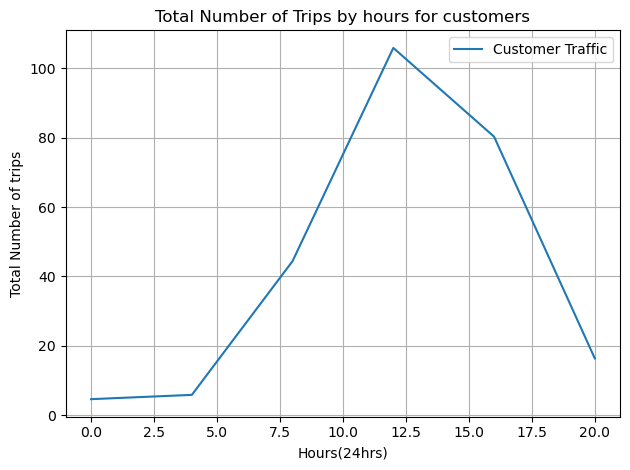

In [614]:
trip_counts = cus_seg_df['trip_counts']
hours = cus_seg_df['hours']


# Plot customer trips
plt.plot(hours,trip_counts, label='Customer Traffic')

# Add labels and title
plt.xlabel('Hours(24hrs)')
plt.ylabel('Total Number of trips')
plt.title('Total Number of Trips by hours for customers')



# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()


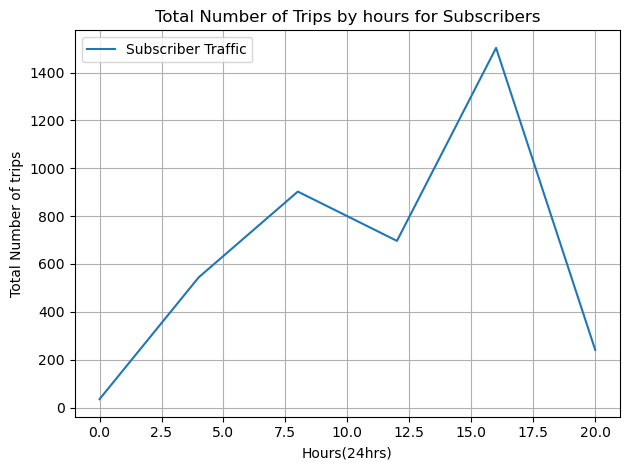

In [615]:
trip_counts = grouped_sub_seg_df['trip_count']
hours = grouped_sub_seg_df['hour']


# Plot customer trips
plt.plot(hours,trip_counts, label='Subscriber Traffic')

# Add labels and title
plt.xlabel('Hours(24hrs)')
plt.ylabel('Total Number of trips')
plt.title('Total Number of Trips by hours for Subscribers')



# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()